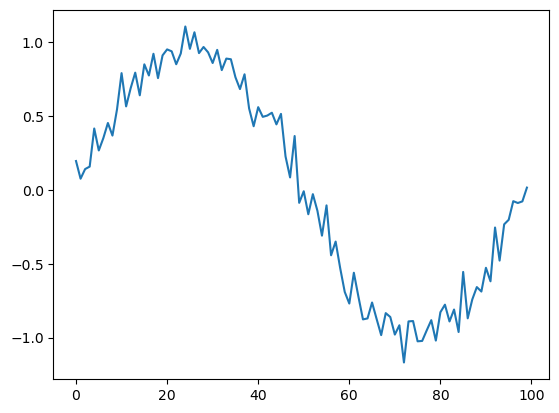

In [24]:
import numpy as np
import matplotlib.pyplot as plt
def cal_autocorrelation(data, lag):
  """
  Tính autocorrelation của dữ liệu tại một khoảng trễ nhất định.

  Args:
    data: Dữ liệu cần tính autocorrelation.
    lag: Khoảng trễ.

  Returns:
    Giá trị autocorrelation tại khoảng trễ đã cho.
  """

  # Tính autocorrelation của dữ liệu.
  autocorrelation = np.correlate(data, data, mode="full")

  # Cắt autocorrelation thành một mẫu có độ dài bằng khoảng trễ.
  autocorrelation = autocorrelation[lag:lag+1]

  return autocorrelation


def filter_noise_by_autocorrelation(data, noise_threshold):
  """
  Lọc tiếng ồn khỏi dữ liệu bằng autocorrelation.

  Args:
    data: Dữ liệu cần lọc tiếng ồn.
    noise_threshold: Ngưỡng tiếng ồn.

  Returns:
    Dữ liệu đã lọc tiếng ồn.
  """

  # Tính autocorrelation của dữ liệu.
  autocorrelation = cal_autocorrelation(data, 5)

  # Lọc các giá trị autocorrelation vượt quá ngưỡng tiếng ồn.
  filtered_autocorrelation = autocorrelation[autocorrelation < noise_threshold]

  # Tạo một bộ lọc dựa trên autocorrelation đã lọc.
  filter_coefficients = filtered_autocorrelation / sum(filtered_autocorrelation)

  # Áp dụng bộ lọc cho dữ liệu.
  filtered_data = np.convolve(data, filter_coefficients, mode="same")

  return filtered_data


# Tạo dữ liệu có chứa tiếng ồn.
data = np.sin(np.linspace(0, 2*np.pi, 100)) + np.random.normal(0, 0.1, 100)

# Lọc tiếng ồn khỏi dữ liệu.
filtered_data = filter_noise_by_autocorrelation(data, 0.1)

# Vẽ dữ liệu gốc và dữ liệu đã lọc.
plt.plot(data)


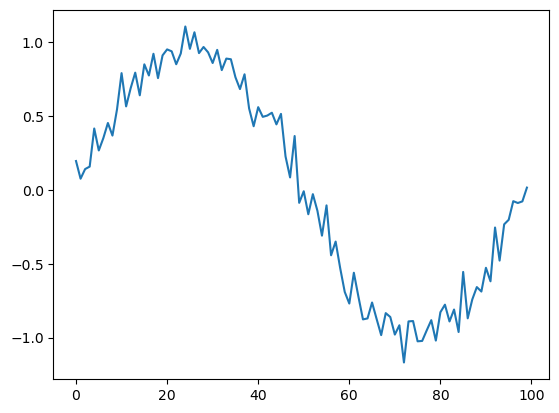

In [25]:
plt.plot(filtered_data)


In [26]:
data - filtered_data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])